In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv("insurance.csv")

In [116]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# EDT

In [163]:
df.shape

(1338, 7)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [119]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [120]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Visualization

In [121]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [122]:
numerical_columns = ['age','bmi','children','charges']
numerical_columns

['age', 'bmi', 'children', 'charges']

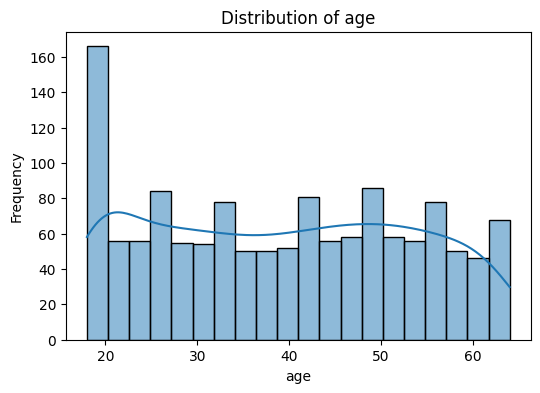

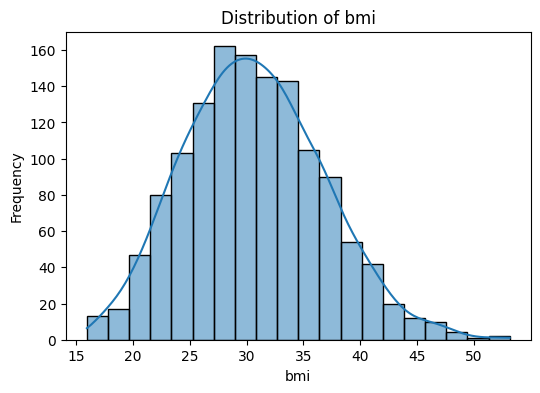

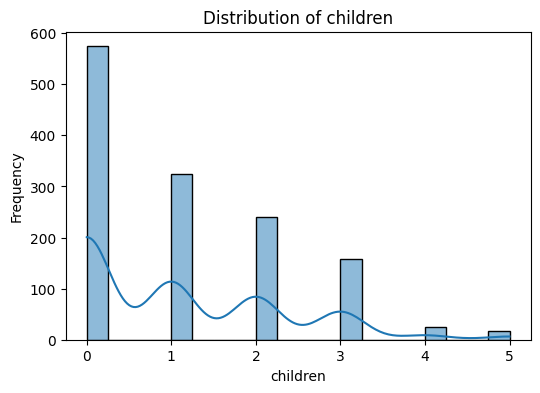

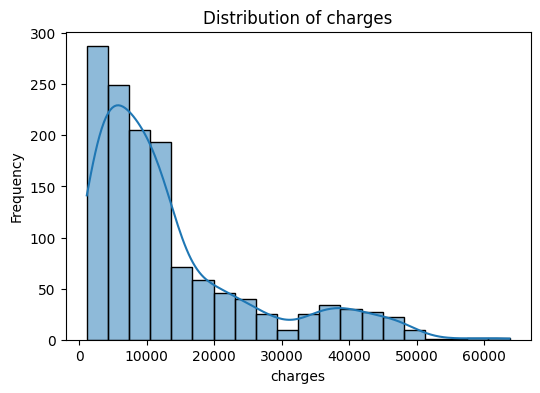

In [123]:
for cal in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[cal],kde=True,bins=20)
    plt.title(f"Distribution of {cal}")
    plt.xlabel(cal)
    plt.ylabel("Frequency")
    plt.show()

<Axes: xlabel='children', ylabel='count'>

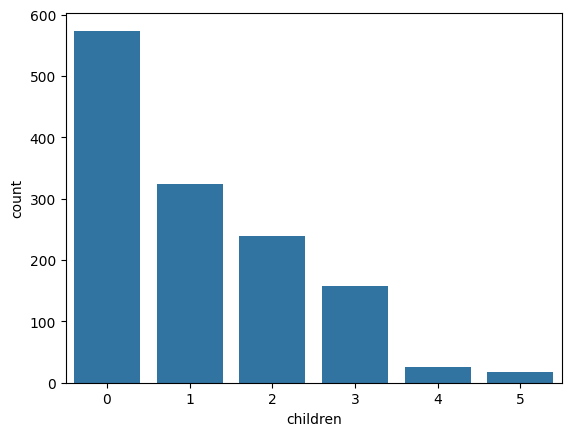

In [124]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

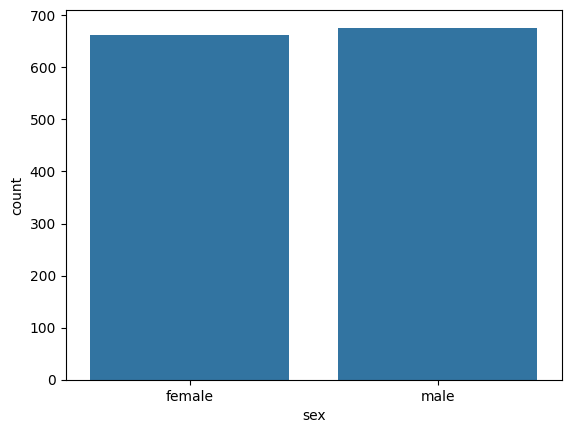

In [125]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

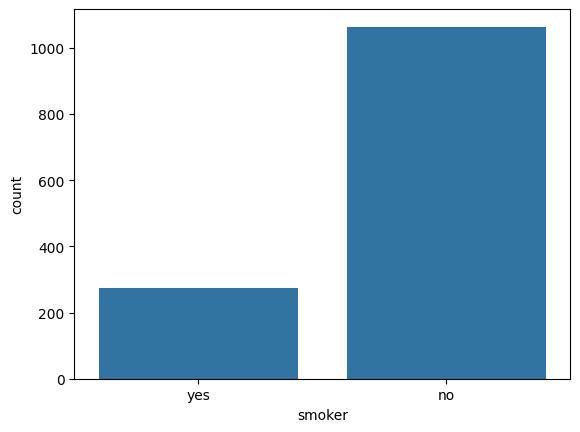

In [126]:
 sns.countplot(x=df['smoker'])

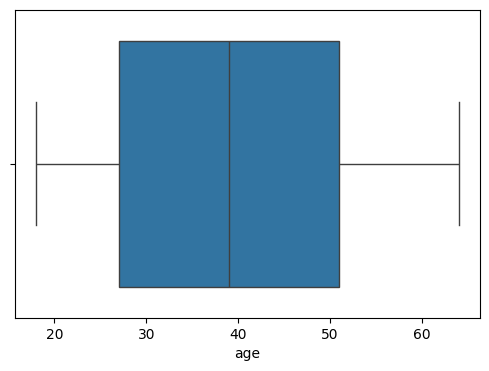

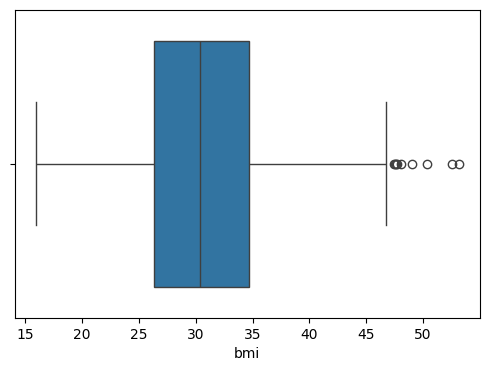

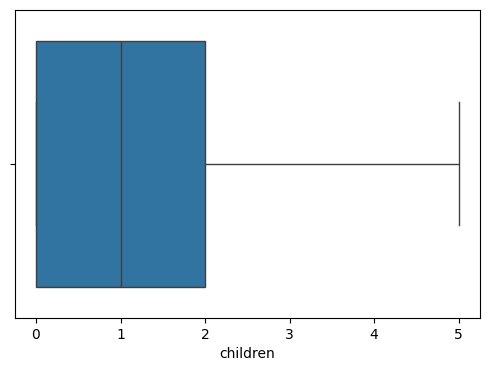

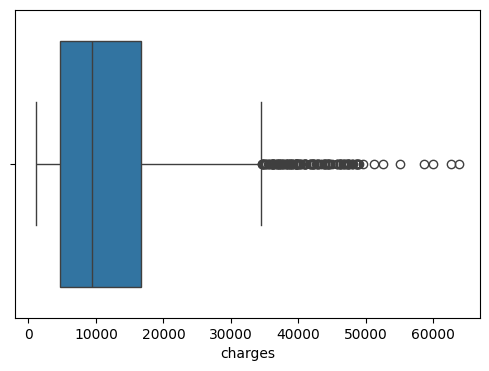

In [127]:
for cal in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[cal])

<Axes: >

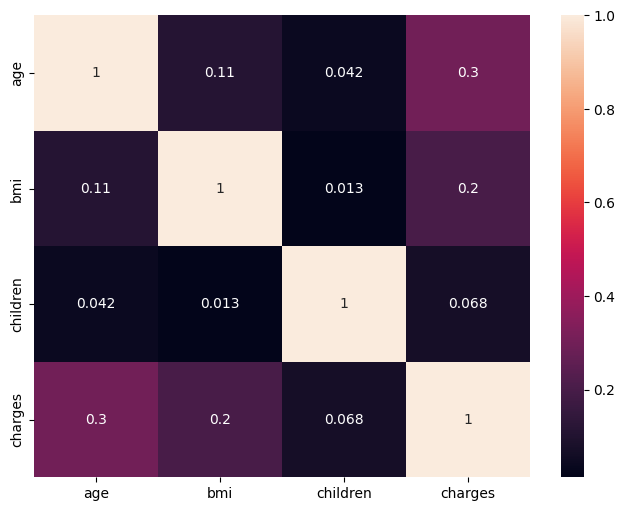

In [128]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Cleaning and Preprocessing 

In [129]:
df_cleaned = df.copy()

In [130]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [131]:
df_cleaned.shape

(1338, 7)

In [132]:
df_cleaned.drop_duplicates(inplace=True)

In [133]:
df_cleaned.shape

(1337, 7)

In [134]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [135]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [136]:
df_cleaned['sex']=df_cleaned['sex'].map({'male': 0,'female': 1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [137]:
df_cleaned['sex']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1337, dtype: int64

In [138]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [139]:
df_cleaned['smoker']=df_cleaned['smoker'].map({'yes':1,'no':0})

In [140]:
df_cleaned.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


In [164]:
df_cleaned.rename( columns = {
    'sex':'is_female',
    'smoker':'is_smoker'},inplace=True)

In [142]:
df_cleaned

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [143]:
df_cleaned = pd.get_dummies(df_cleaned,columns= ['region'],drop_first=True)

In [144]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False
1334,18,1,31.920,0,0,2205.98080,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,True


In [145]:
df_cleaned = df_cleaned.astype(int)

In [146]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

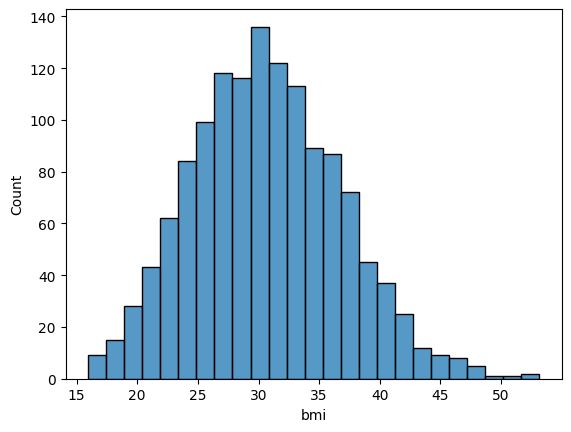

In [147]:
sns.histplot(df['bmi'])

In [148]:
df_cleaned['bmi_categories'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['Underwaight','Normal','Overweight','Obese']
)

In [149]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categories
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


<Axes: xlabel='bmi_categories', ylabel='Count'>

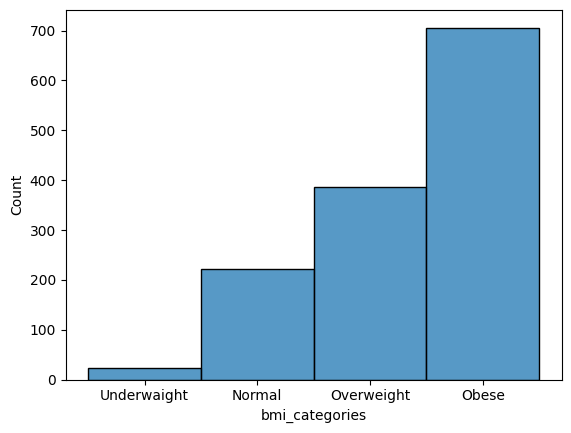

In [150]:
sns.histplot(x=df_cleaned['bmi_categories'])

In [151]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['bmi_categories'],drop_first=True)

In [152]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [153]:
df_cleaned= df_cleaned.astype(int)

In [154]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


## Feature scaling

In [165]:
from sklearn.preprocessing import StandardScaler

cols = ['age','bmi','children']

In [156]:
Scaler = StandardScaler()

In [157]:
df_cleaned[cols] = Scaler.fit_transform(df_cleaned[cols])

In [167]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categories_Normal,bmi_categories_Overweight,bmi_categories_Obese,charges_bin
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,3
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,3
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,0


In [159]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_categories_Normal', 'bmi_categories_Overweight',
       'bmi_categories_Obese'],
      dtype='object')

In [160]:
from scipy.stats import pearsonr

Selected_features = [
   'age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_categories_Normal', 'bmi_categories_Overweight',
       'bmi_categories_Obese'
]

correlations = {
    feature:pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]
    for feature in Selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()),columns=['Feature','Pearson Correlation'])

correlations_df.sort_values(by='Pearson Correlation' , ascending = False)


,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_categories_Obese,0.200348
2,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,is_female,-0.058046
8,bmi_categories_Normal,-0.104042


In [169]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [168]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')

KeyError: 'bmi_category_Normal'